In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
data_centers = range(5)
user_locations = range(5, 13)

In [3]:
forwarding_matrix = np.array([
    [0.0, 0.999997, 1.08188e-6, 5.63304e-7, 1.08188e-6],
    [0.0, 0.362978, 0.63702, 9.05456e-7, 9.98506e-7],
    [0.0, 1.0513e-6, 0.999997, 1.0513e-6, 5.66606e-7],
    [0.0, 9.05456e-7, 0.63702, 0.362978, 9.98506e-7],
    [0.0, 5.63304e-7, 1.08188e-6, 0.999997, 1.08188e-6],
    [0.0, 9.05456e-7, 9.98506e-7, 0.362978, 0.63702],
    [0.0, 1.0513e-6, 5.66606e-7, 1.0513e-6, 0.999997],
    [0.0, 0.362978, 9.98506e-7, 9.05456e-7, 0.63702]
])

In [4]:
forwarding_matrix = np.round(forwarding_matrix, decimals=2)

In [5]:
forwarding_matrix

array([[0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.36, 0.64, 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.64, 0.36, 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.36, 0.64],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.36, 0.  , 0.  , 0.64]])

In [6]:
G = nx.DiGraph()
for data_center in data_centers:
    G.add_node(data_center)
for user_loc in user_locations:
    G.add_node(user_loc)
for (i, row) in enumerate(forwarding_matrix):
    user_loc = 5 + i
    for (data_center, p) in enumerate(row):
        if p > 1e-3:
            G.add_edge(user_loc, data_center, weight=p)

In [7]:
pos = {0: np.array([0, 0])}
for i in range(1, 5):
    pos[i] = np.array([0.7 * np.cos(2 * np.pi * (i - 1) / 4), 0.7 * np.sin(2 * np.pi * (i - 1) / 4)])
for i in range(5, 13):
    pos[i] = np.array([np.cos(2 * np.pi * (i - 5) / 8), np.sin(2 * np.pi * (i - 5) / 8)])

In [8]:
capacity = {
    0: 0,
    1: 4,
    2: 5,
    3: 4,
    4: 5,
}

/tmp/ipykernel_11020/3457014675.py:6: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=[edge], width=5 * edge[2])


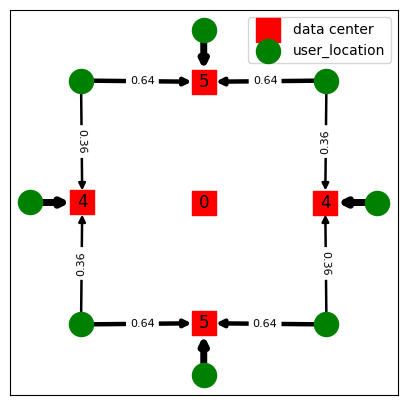

In [10]:
plt.figure(figsize=(5, 5))
nx.draw_networkx_nodes(G, pos, nodelist=data_centers, node_color="red", node_shape="s", label="data center")
nx.draw_networkx_nodes(G, pos, nodelist=user_locations, node_color="green", label="user_location")
nx.draw_networkx_labels(G, pos, labels=capacity)
for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=5 * edge[2])
edge_labels = {e: w for (e, w) in nx.get_edge_attributes(G, "weight").items() if w != 1}
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)
plt.legend()
plt.savefig("ring_edge_naive_18.png")